# 🚗 Vehicle Price Prediction with Deep Learning

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('dataset.csv')
df.fillna(method='ffill', inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,Al West is committed to offering every custome...,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


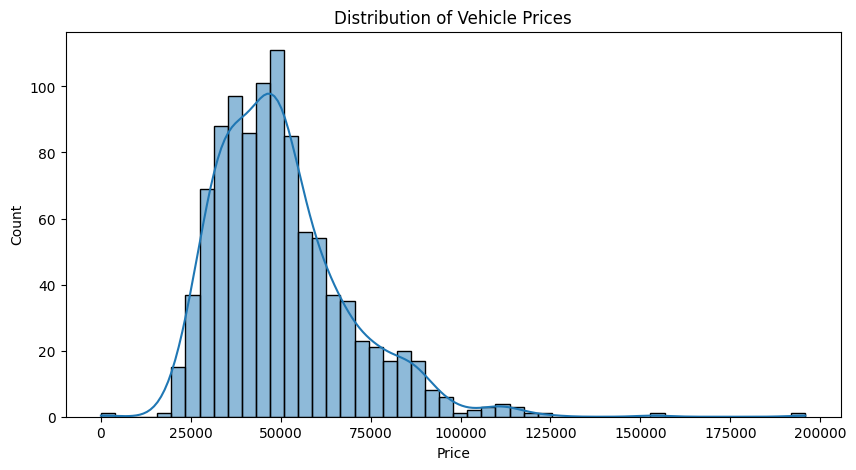

In [11]:
# Visualize price distribution
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

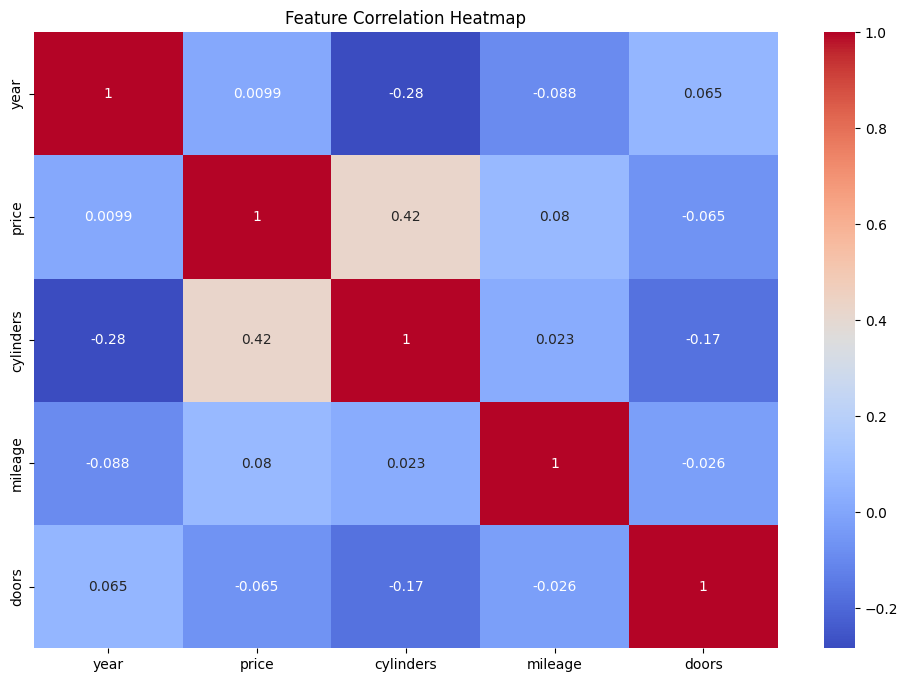

In [14]:
# Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
X = df.drop(['price', 'description', 'name'], axis=1)
y = df['price']
non_numeric_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col].astype(str))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, batch_size=32)

Epoch 1/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2992164096.0000 - mae: 50769.0430 - val_loss: 2564723712.0000 - val_mae: 48044.1289
Epoch 2/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2797558528.0000 - mae: 49527.8516 - val_loss: 2554057216.0000 - val_mae: 47936.5820
Epoch 3/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2952999680.0000 - mae: 50784.8750 - val_loss: 2509486592.0000 - val_mae: 47487.3477
Epoch 4/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2816957440.0000 - mae: 49750.2734 - val_loss: 2382494464.0000 - val_mae: 46189.1602
Epoch 5/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2696035328.0000 - mae: 48464.5508 - val_loss: 2100228096.0000 - val_mae: 43163.4922
Epoch 6/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2209021184.0000 - mae: 43440.3320 - val_loss: 1610236416.0000 - val_mae: 37291.6133
Epoch 7/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1638714880.0000 - mae: 36677.9023 - val_loss: 969609088.0000 - val_mae: 27613.0605
Epoch 

In [18]:
model.save('vehicle_price_model.h5')
print("Model Saved Successfully.")

Model Saved Successfully.


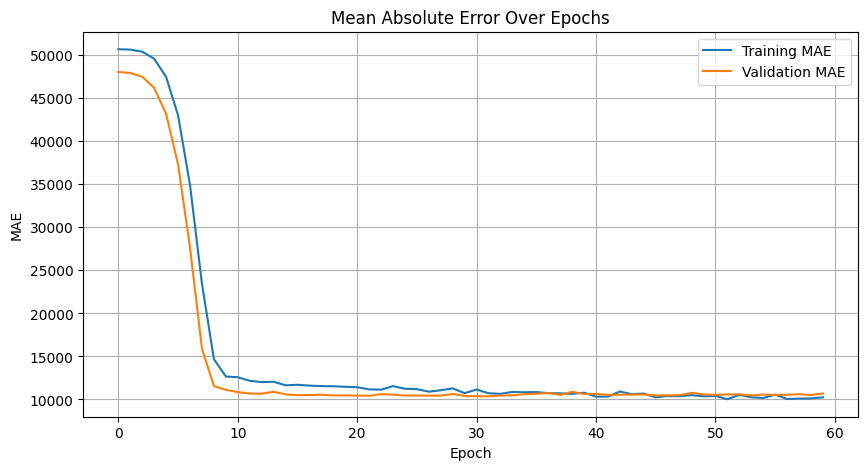

In [19]:
# Visualize training history
plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()